# Projeto de Parceria

Neste projeto usarei a base [Los Angeles Crime Dataset (2020 -- Present)](https://www.kaggle.com/datasets/nathaniellybrand/los-angeles-crime-dataset-2020-present) do usuário Savor Sauce.

A base trata de de 752.911 registros, sendo cada linha referente a um reporte de crime na cidade de Los Angeles desde 2020. Uma vez compreendida as informações relativas às ocorrências, cabe a este projeto entender o perfil das ocorrências dentro da realidade reportada na cidade.

O objetivo identificar áreas de risco para que possam ser reivindicadas ações de segurança pública.

|Variável                         |Descrição          |
|---------------------------------|:------------------| 
|DR_NO                            | ID do registro | 
|Date Rptd                        | Data que o crime foi reportado | 
|DATE OCC                         | Data que o crime ocorreu | 
|TIME OCC                         | Hora que o crime ocorreu | 
|AREA                             | Código da área que o crime ocorreu | 
|AREA NAME                        | Categoria da área que o crime ocorreu | 
|Rpt Dist No                      | Código do distrito que o crime foi reportado | 
|Part 1-2                         | A COMPREENDER | 
|Crm Cd                           | Código do crime reportado | 
|Crm Cd Desc                      | Descrição do crime reportado | 
|Mocodes                          | A COMPREENDER | 
|Vict Age                         | Idade da vítima | 
|Vict Sex                         | Sexo da vítima | 
|Vict Descent                     | Descendência da vítima | 
|Premis Cd                        | Código do tipo de local que o crime ocorreu | 
|Premis Desc                      | Descrição do tipo de local que o crime ocorreu | 
|Weapon Used Cd                   | Código do armamento utilizado | 
|Weapon Desc                      | Descrição do armamento utilizado |
|Status                           | Código do status do registro |
|Status Desc                      | Descrição do status do registro |
|Crm Cd 1                         | Primeiro código do crime |
|Crm Cd 2                         | Segundo código do crime |
|Crm Cd 3                         | Terceiro código do crime |
|Crm Cd 4                         | Quarto código do crime |
|LOCATION                         | Localização do crime |
|Cross Street                     | Rua de cruzamento |
|LAT                              | Latitude de onde o crime ocorreu |
|LON                              | Longitude de onde o crime ocorreu |

## Bibliotecas utilizadas

In [658]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from sklearn.metrics import r2_score 

## Conhecendo a base de dados

In [50]:
data = pd.read_csv('la_crime.csv')

In [51]:
data.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,200110444,04/14/2020 12:00:00 AM,02/13/2020 12:00:00 AM,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,...,AA,Adult Arrest,845.0,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474
3,191501505,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019
4,191921269,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468


In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 752911 entries, 0 to 752910
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DR_NO           752911 non-null  int64  
 1   Date Rptd       752911 non-null  object 
 2   DATE OCC        752911 non-null  object 
 3   TIME OCC        752911 non-null  int64  
 4   AREA            752911 non-null  int64  
 5   AREA NAME       752911 non-null  object 
 6   Rpt Dist No     752911 non-null  int64  
 7   Part 1-2        752911 non-null  int64  
 8   Crm Cd          752911 non-null  int64  
 9   Crm Cd Desc     752911 non-null  object 
 10  Mocodes         649650 non-null  object 
 11  Vict Age        752911 non-null  int64  
 12  Vict Sex        654681 non-null  object 
 13  Vict Descent    654675 non-null  object 
 14  Premis Cd       752902 non-null  float64
 15  Premis Desc     752476 non-null  object 
 16  Weapon Used Cd  261472 non-null  float64
 17  Weapon Des

In [56]:
len(data.DR_NO.value_counts())

752911

In [63]:
data.isnull().sum().sort_values(ascending=False)

Crm Cd 4          752855
Crm Cd 3          751044
Crm Cd 2          697204
Cross Street      631859
Weapon Used Cd    491439
Weapon Desc       491439
Mocodes           103261
Vict Descent       98236
Vict Sex           98230
Premis Desc          435
Crm Cd 1              10
Premis Cd              9
LAT                    0
LOCATION               0
Status Desc            0
Status                 0
DR_NO                  0
Date Rptd              0
Vict Age               0
Crm Cd Desc            0
Crm Cd                 0
Part 1-2               0
Rpt Dist No            0
AREA NAME              0
AREA                   0
TIME OCC               0
DATE OCC               0
LON                    0
dtype: int64

In [494]:
data.fillna('-',inplace=True) #Por se tratar de registros de crimes, não faz sentido preencher os missings com informações supostas
data_ajust = data[(data['Vict Age']>0) & (data['Vict Sex']!='-') & (data['Vict Descent']!='-')]

In [515]:
data_ajust.describe().round(0)

,DR_NO,TIME OCC,AREA,Rpt Dist No,Part 1-2,Crm Cd,Vict Age,LAT,LON
count,569165.0,569165.0,569165.0,569165.0,569165.0,569165.0,569165.0,569165.0,569165.0
mean,214763903.0,1322.0,11.0,1116.0,1.0,499.0,40.0,34.0,-118.0
std,10243690.0,652.0,6.0,616.0,0.0,222.0,16.0,2.0,6.0
min,10304468.0,1.0,1.0,101.0,1.0,110.0,2.0,0.0,-119.0
25%,202113311.0,900.0,5.0,587.0,1.0,330.0,28.0,34.0,-118.0
50%,211911863.0,1400.0,11.0,1135.0,1.0,440.0,37.0,34.0,-118.0
75%,221421252.0,1844.0,16.0,1633.0,2.0,626.0,50.0,34.0,-118.0
max,239909747.0,2359.0,21.0,2199.0,2.0,956.0,99.0,34.0,0.0


array([[<AxesSubplot:title={'center':'TIME OCC'}>,
        <AxesSubplot:title={'center':'Vict Age'}>,
        <AxesSubplot:title={'center':'Crm Cd'}>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

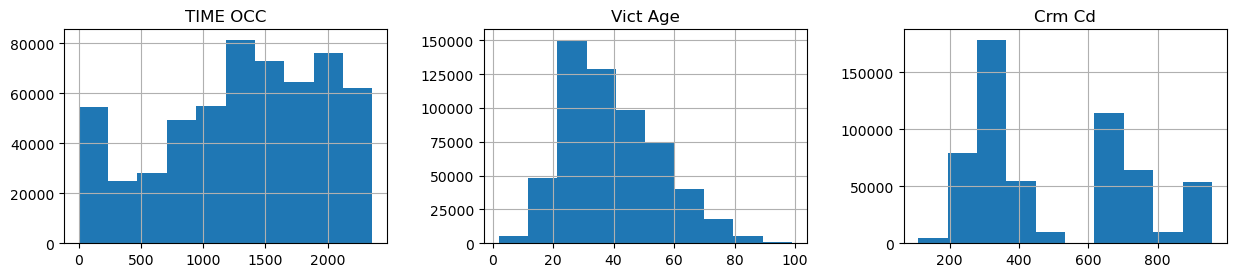

In [495]:
df = data_ajust[['TIME OCC', 'Vict Age','Crm Cd']]
df.hist(layout=(3,3), figsize=(15,10))

In [496]:
total = data_ajust.groupby('Vict Age')['DR_NO'].count().sort_values(ascending=False)
print(total[:10])
print(total[:10].sum())
print(total[:10].index.min())
print(total[:10].index.max())
print(total[:10].sum()/total.sum())

Vict Age
30    17300
35    16902
31    16513
29    16486
28    16188
32    16104
27    15597
33    15493
26    15065
34    14832
Name: DR_NO, dtype: int64
160480
26
35
0.2819569017771648


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, 'H'),
  Text(1, 0, 'W'),
  Text(2, 0, 'B'),
  Text(3, 0, 'O'),
  Text(4, 0, 'A'),
  Text(5, 0, 'X'),
  Text(6, 0, 'K'),
  Text(7, 0, 'F'),
  Text(8, 0, 'C'),
  Text(9, 0, 'J'),
  Text(10, 0, 'V'),
  Text(11, 0, 'I'),
  Text(12, 0, 'Z'),
  Text(13, 0, 'P'),
  Text(14, 0, 'U'),
  Text(15, 0, 'D'),
  Text(16, 0, 'G'),
  Text(17, 0, 'L'),
  Text(18, 0, 'S')])

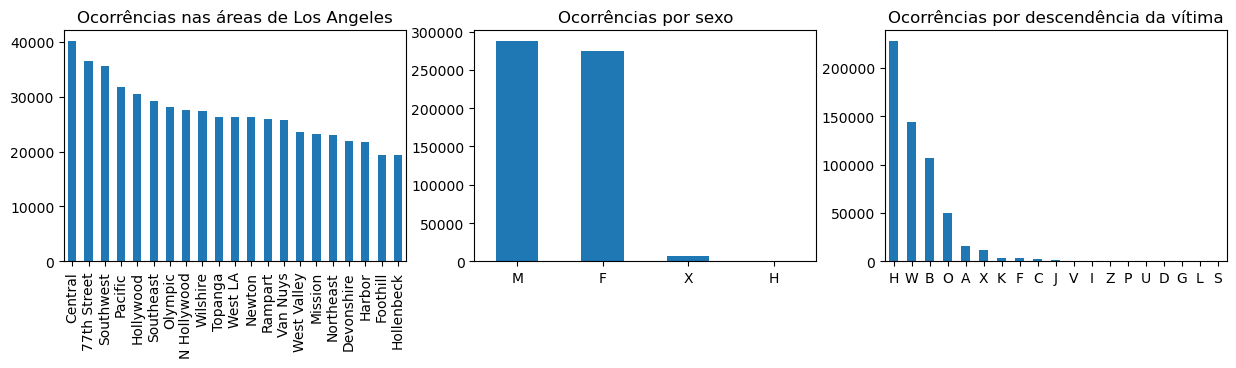

In [497]:
plt.figure(figsize = ((15, 3)))
plt.subplot(1,3,1)
areas = data_ajust['AREA NAME'].value_counts()
areas.plot(kind='bar')
plt.title("Ocorrências nas áreas de Los Angeles", fontsize = 12)
plt.subplot(1,3,2)
sexo = data_ajust['Vict Sex'].value_counts() #X: x-gender / não binário
sexo.plot(kind='bar') 
plt.title("Ocorrências por sexo", fontsize = 12)
plt.xticks(rotation=0)
plt.subplot(1,3,3)
descendencia = data_ajust['Vict Descent'].value_counts() #H: hispanic, W: white, B: black
descendencia.plot(kind='bar')
plt.title("Ocorrências por descendência da vítima", fontsize = 12)
plt.xticks(rotation=0)

In [501]:
print(areas[:5])
print(areas[:5].sum())
print(areas[:5].sum()/areas.sum())
print(sexo[:2].sum()/sexo.sum())
print(descendencia[:4].sum()/descendencia.sum())

Central        40043
77th Street    36501
Southwest      35651
Pacific        31766
Hollywood      30519
Name: AREA NAME, dtype: int64
174480
0.30655433837287954
0.9878998181546652
0.9271898307169274


In [506]:
data_ajust.groupby('Premis Desc')['Premis Desc'].count().sort_values(ascending=False)[:10]

Premis Desc
SINGLE FAMILY DWELLING                          125429
STREET                                          104713
MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)     88233
PARKING LOT                                      36764
SIDEWALK                                         30493
VEHICLE, PASSENGER/TRUCK                         21311
OTHER BUSINESS                                   17674
GARAGE/CARPORT                                   11601
DRIVEWAY                                          9101
PARKING UNDERGROUND/BUILDING                      5985
Name: Premis Desc, dtype: int64

In [507]:
data_ajust.groupby('Weapon Desc')['Weapon Desc'].count().sort_values(ascending=False)[:10]

Weapon Desc
-                                                 328475
STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)    133426
UNKNOWN WEAPON/OTHER WEAPON                        23353
VERBAL THREAT                                      18017
HAND GUN                                           14008
SEMI-AUTOMATIC PISTOL                               5142
KNIFE WITH BLADE 6INCHES OR LESS                    5133
OTHER KNIFE                                         4440
UNKNOWN FIREARM                                     4225
MACE/PEPPER SPRAY                                   2716
Name: Weapon Desc, dtype: int64

In [508]:
data_ajust.groupby('AREA NAME')['Vict Age'].mean().round(0).sort_values(ascending=False)

AREA NAME
West Valley    43.0
West LA        43.0
Devonshire     42.0
Northeast      41.0
Pacific        41.0
Foothill       41.0
Harbor         41.0
Van Nuys       41.0
Topanga        41.0
Wilshire       40.0
N Hollywood    40.0
Olympic        39.0
Mission        39.0
Hollenbeck     39.0
77th Street    39.0
Central        38.0
Rampart        38.0
Southeast      38.0
Hollywood      38.0
Newton         37.0
Southwest      36.0
Name: Vict Age, dtype: float64

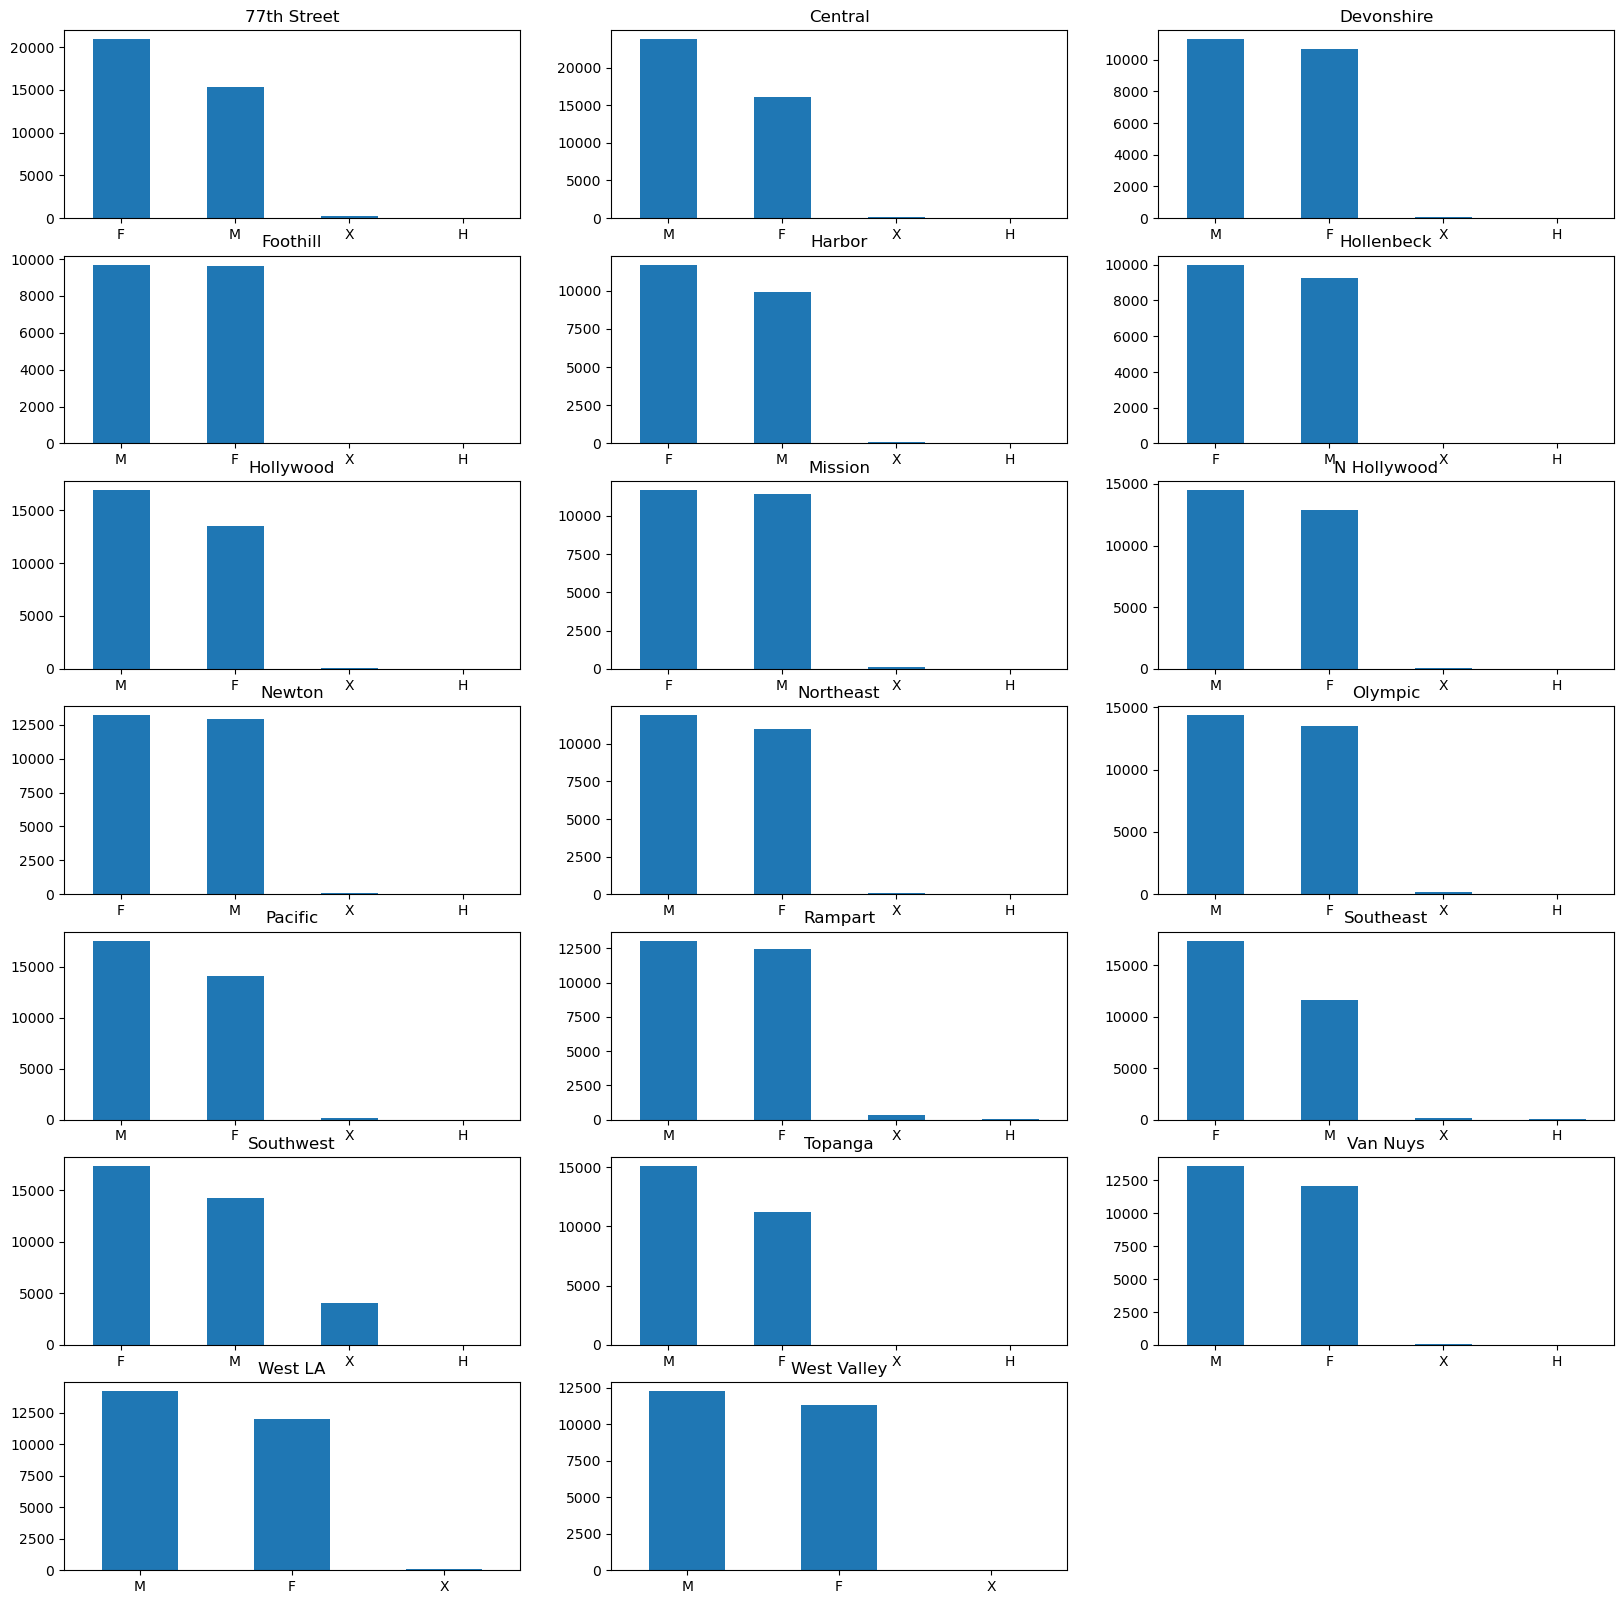

In [509]:
areas = data_ajust['AREA NAME'].unique()
areas.sort()
plt.figure(figsize = ((20, 20)))
for i in range(1,len(areas)):
    plt.subplot(7,3,i)
    df_reduzido = data_ajust[(data_ajust['AREA NAME']==areas[i-1]) & (data_ajust['Vict Sex'] != '-') & (data_ajust['Vict Descent'] != '-')]
    sexo = df_reduzido['Vict Sex'].value_counts()
    sexo.plot(kind='bar') 
    plt.title(areas[i-1], fontsize = 12)
    plt.xticks(rotation=0)

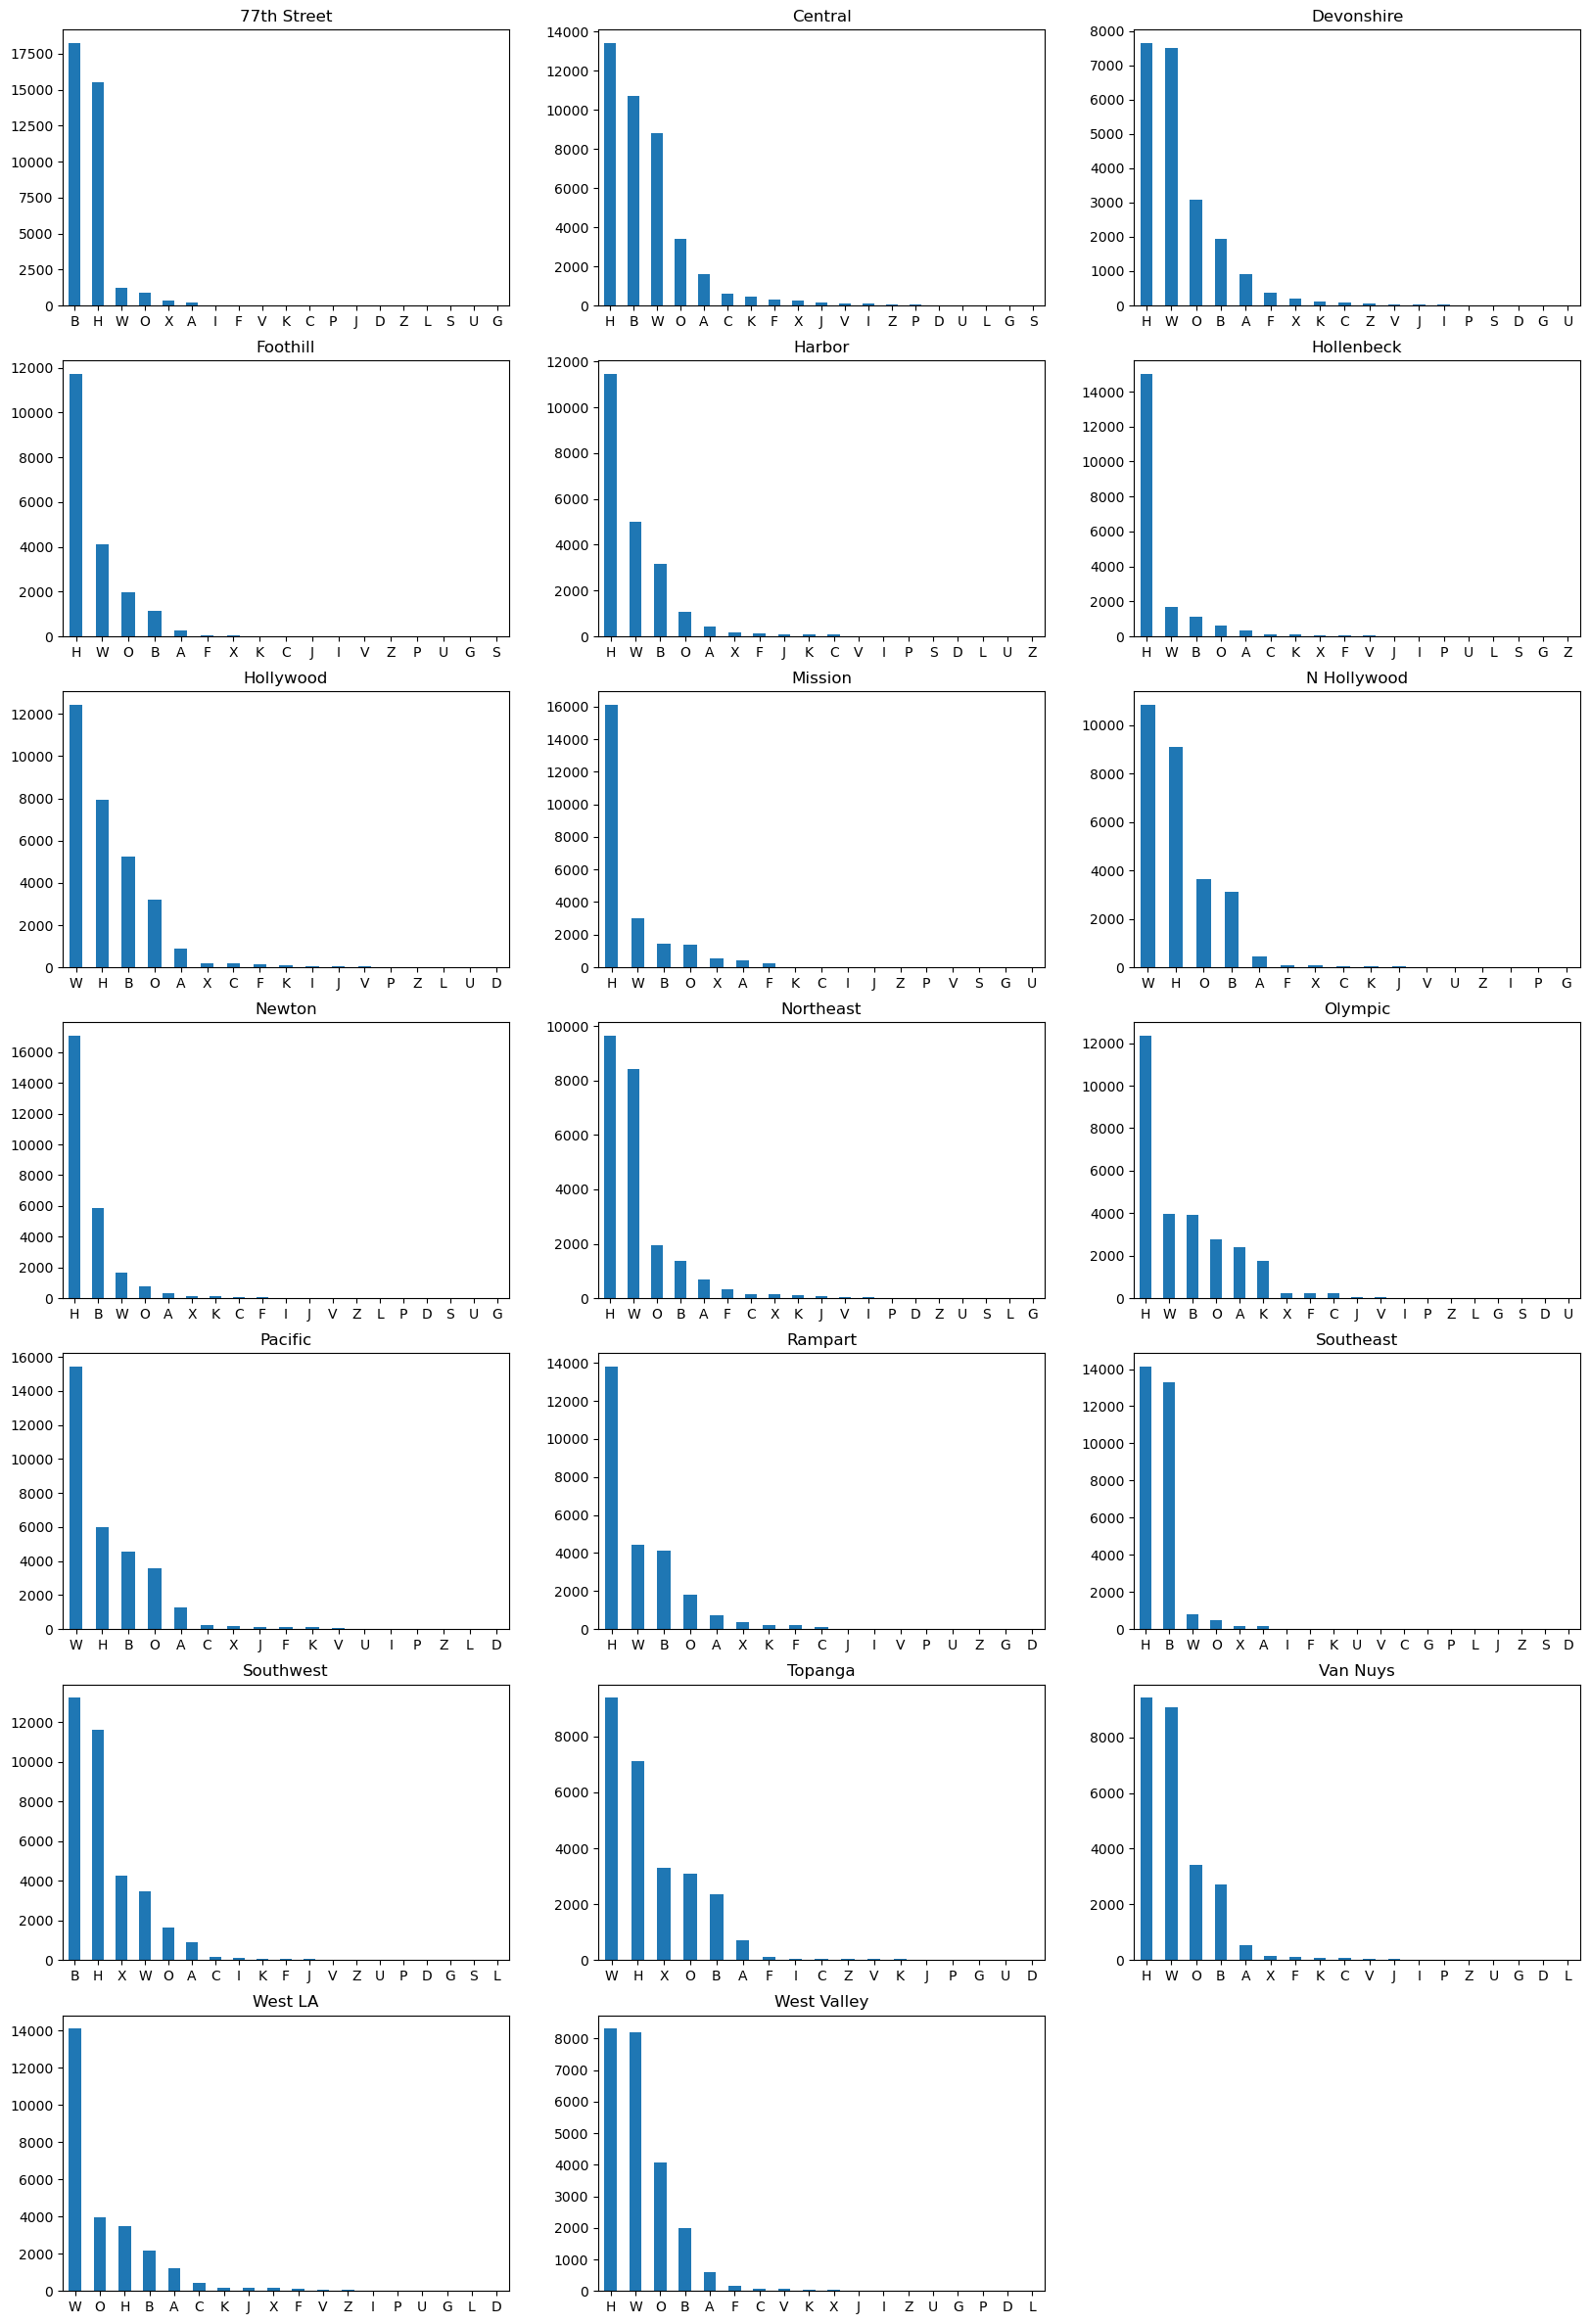

In [510]:
plt.figure(figsize = ((20, 30)))
for i in range(1,len(areas)):
    plt.subplot(7,3,i)
    df_reduzido = data_ajust[(data_ajust['AREA NAME']==areas[i-1]) & (data_ajust['Vict Sex'] != '-') & (data_ajust['Vict Descent'] != '-')]
    descendencia = df_reduzido['Vict Descent'].value_counts()
    descendencia.plot(kind='bar') 
    plt.title(areas[i-1], fontsize = 12)
    plt.xticks(rotation=0)

In [511]:
data_ajust.groupby('AREA NAME')['TIME OCC'].mean().round(0).sort_values(ascending=False)

AREA NAME
Wilshire       1346.0
Topanga        1344.0
Northeast      1343.0
Pacific        1342.0
Central        1335.0
West Valley    1331.0
West LA        1329.0
Mission        1329.0
Devonshire     1329.0
Foothill       1324.0
Southwest      1323.0
Van Nuys       1323.0
Harbor         1322.0
Rampart        1322.0
Olympic        1319.0
Hollenbeck     1319.0
N Hollywood    1317.0
Southeast      1304.0
Newton         1296.0
77th Street    1294.0
Hollywood      1286.0
Name: TIME OCC, dtype: float64

In [537]:
crimes = data_ajust.groupby(['Crm Cd Desc','Crm Cd'])['Crm Cd'].count().sort_values(ascending=False)
print(crimes[:26])
print(crimes[:26].sum()/crimes.sum())
print(len(data_ajust['Crm Cd'].unique()))

Crm Cd Desc                                               Crm Cd
BATTERY - SIMPLE ASSAULT                                  624       58876
THEFT OF IDENTITY                                         354       47787
BURGLARY FROM VEHICLE                                     330       45139
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT            230       41504
INTIMATE PARTNER - SIMPLE ASSAULT                         626       37571
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)   740       34780
THEFT PLAIN - PETTY ($950 & UNDER)                        440       33430
BURGLARY                                                  310       31363
THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND OVER)       331       26225
ROBBERY                                                   210       20802
THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD  341       19616
VANDALISM - MISDEAMEANOR ($399 OR UNDER)                  745       16431
CRIMINAL THREATS - NO WEAPON DISPLAYED         

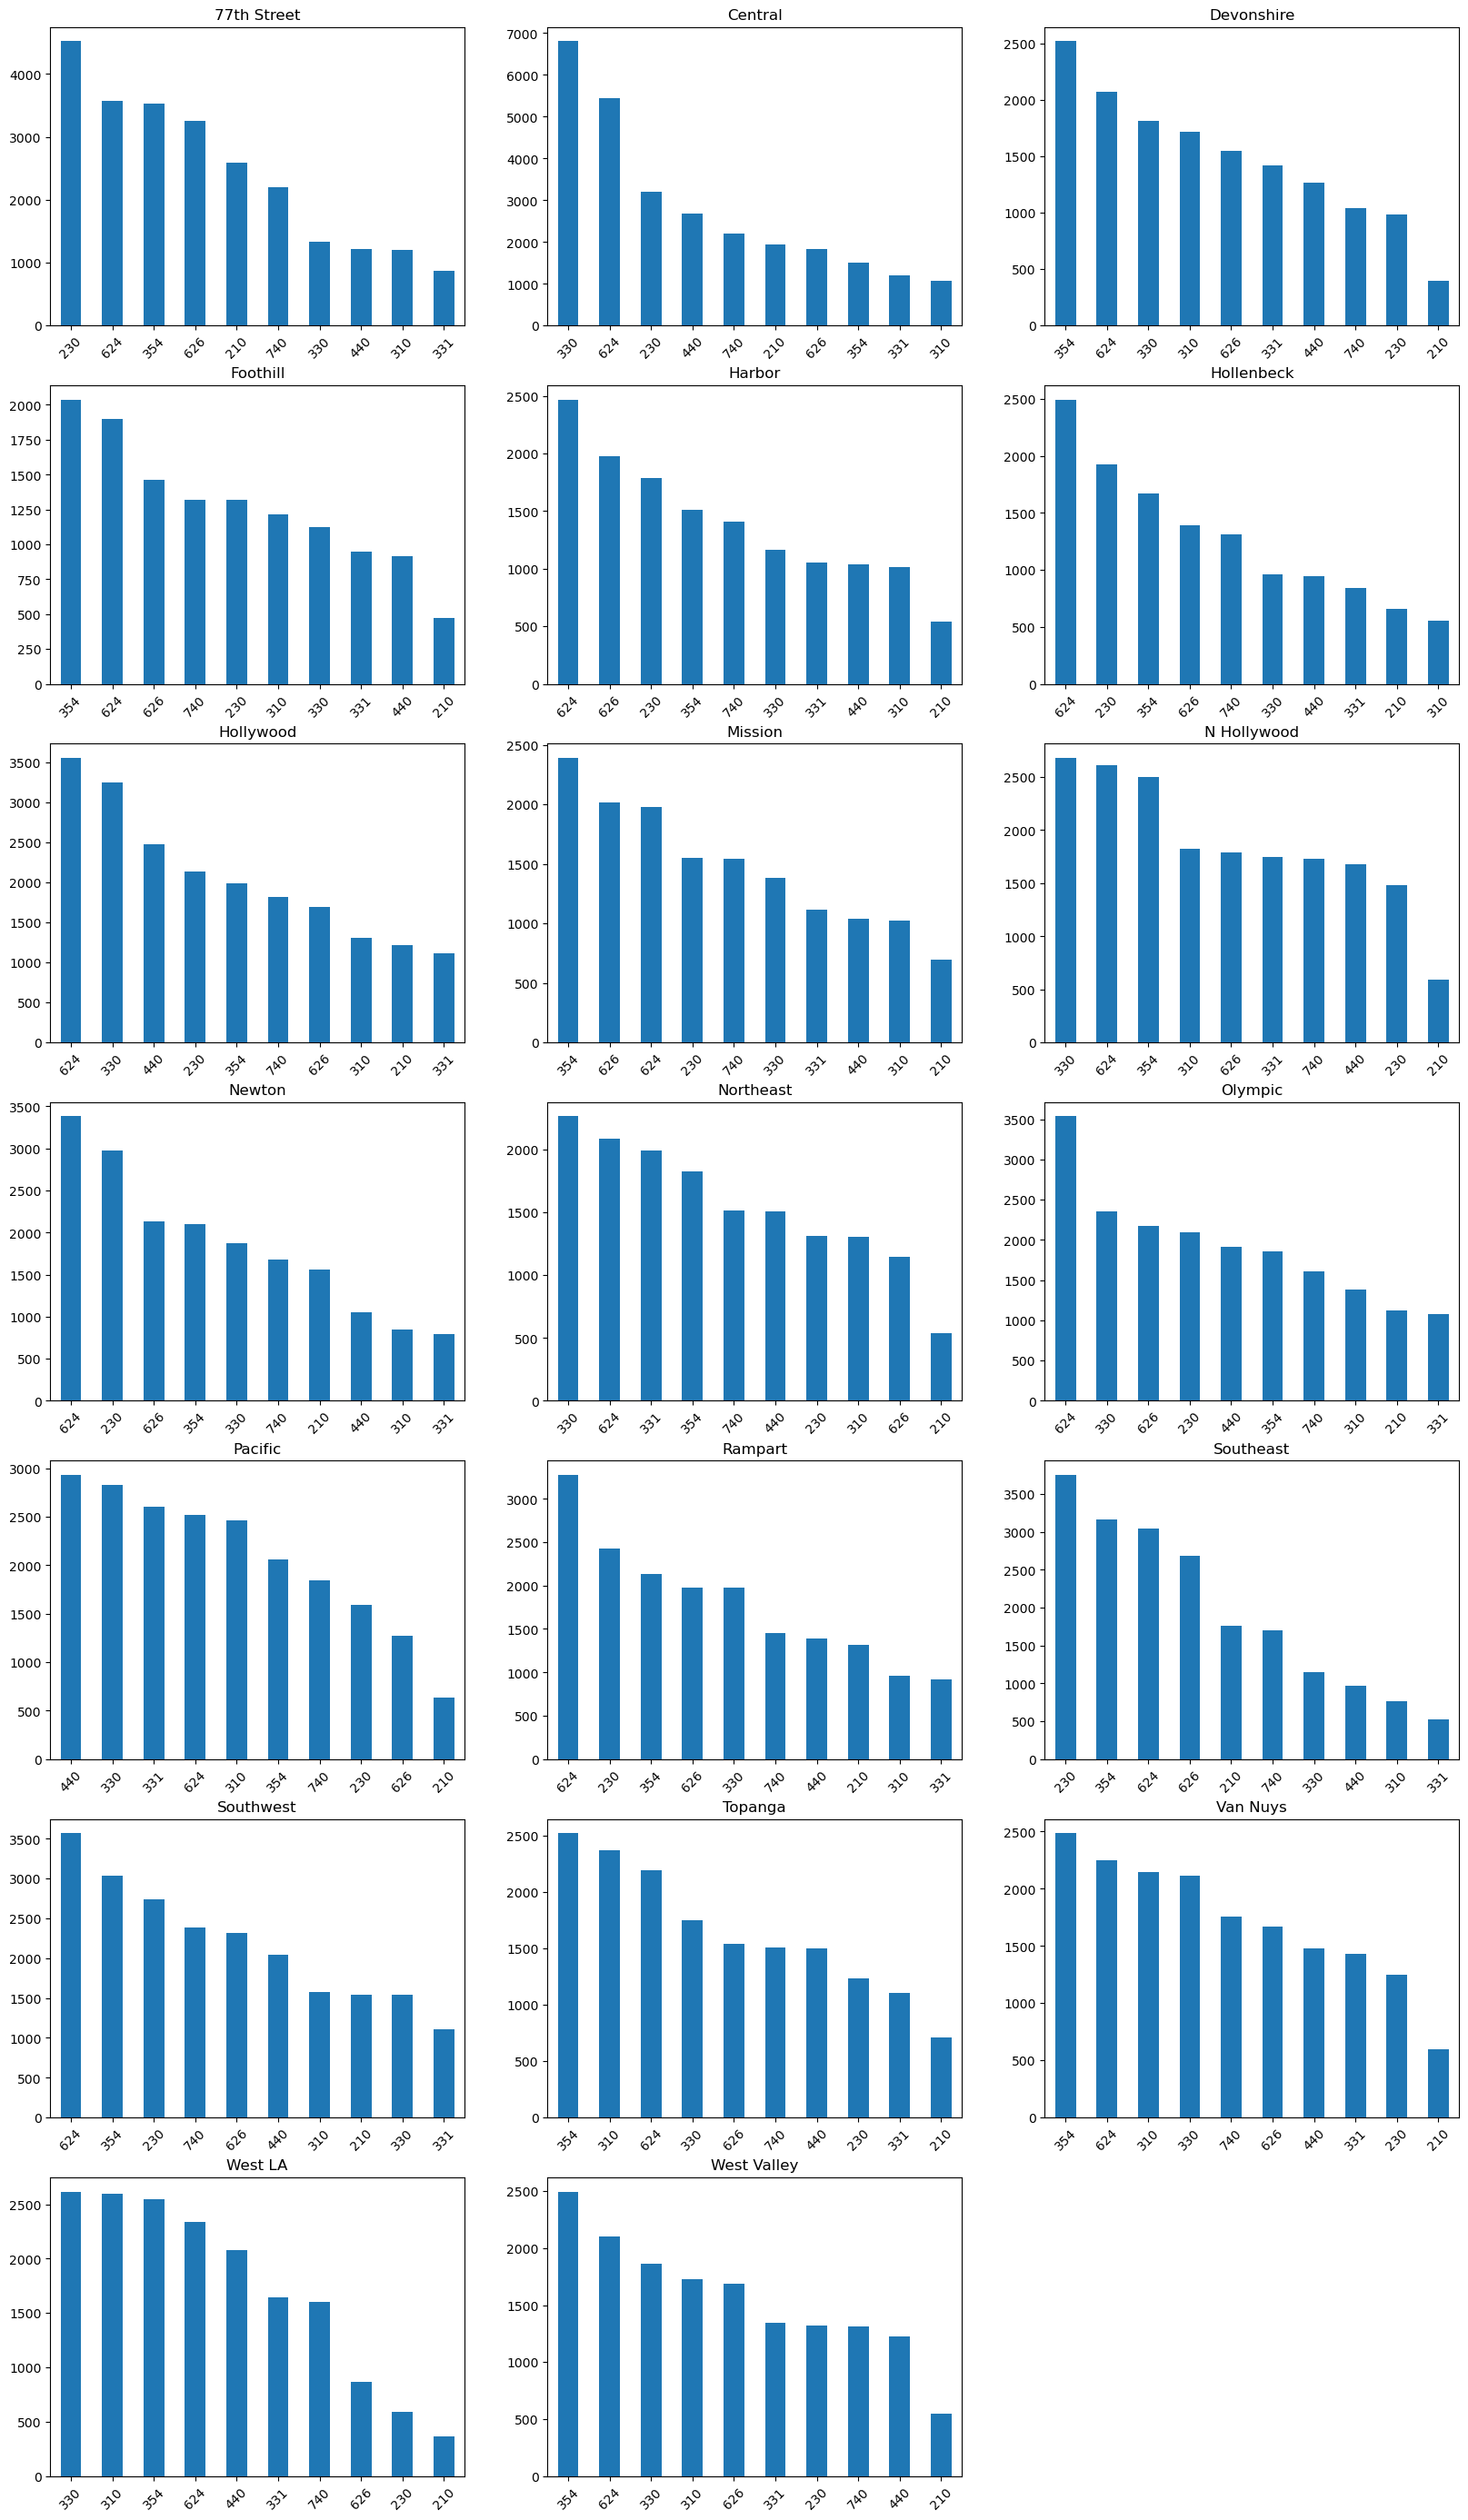

In [549]:
lista_crimes = list(data_ajust.groupby('Crm Cd Desc')['Crm Cd'].count().sort_values(ascending=False).index[:10])
plt.figure(figsize = ((20, 35)))
for i in range(1,len(areas)):
    plt.subplot(7,3,i)
    df_reduzido = data_ajust[(data_ajust['AREA NAME']==areas[i-1]) & (data_ajust['Crm Cd Desc'].isin(lista_crimes))]
    descendencia = df_reduzido['Crm Cd'].value_counts()
    descendencia.plot(kind='bar') 
    plt.title(areas[i-1], fontsize = 12)
    plt.xticks(rotation=45)

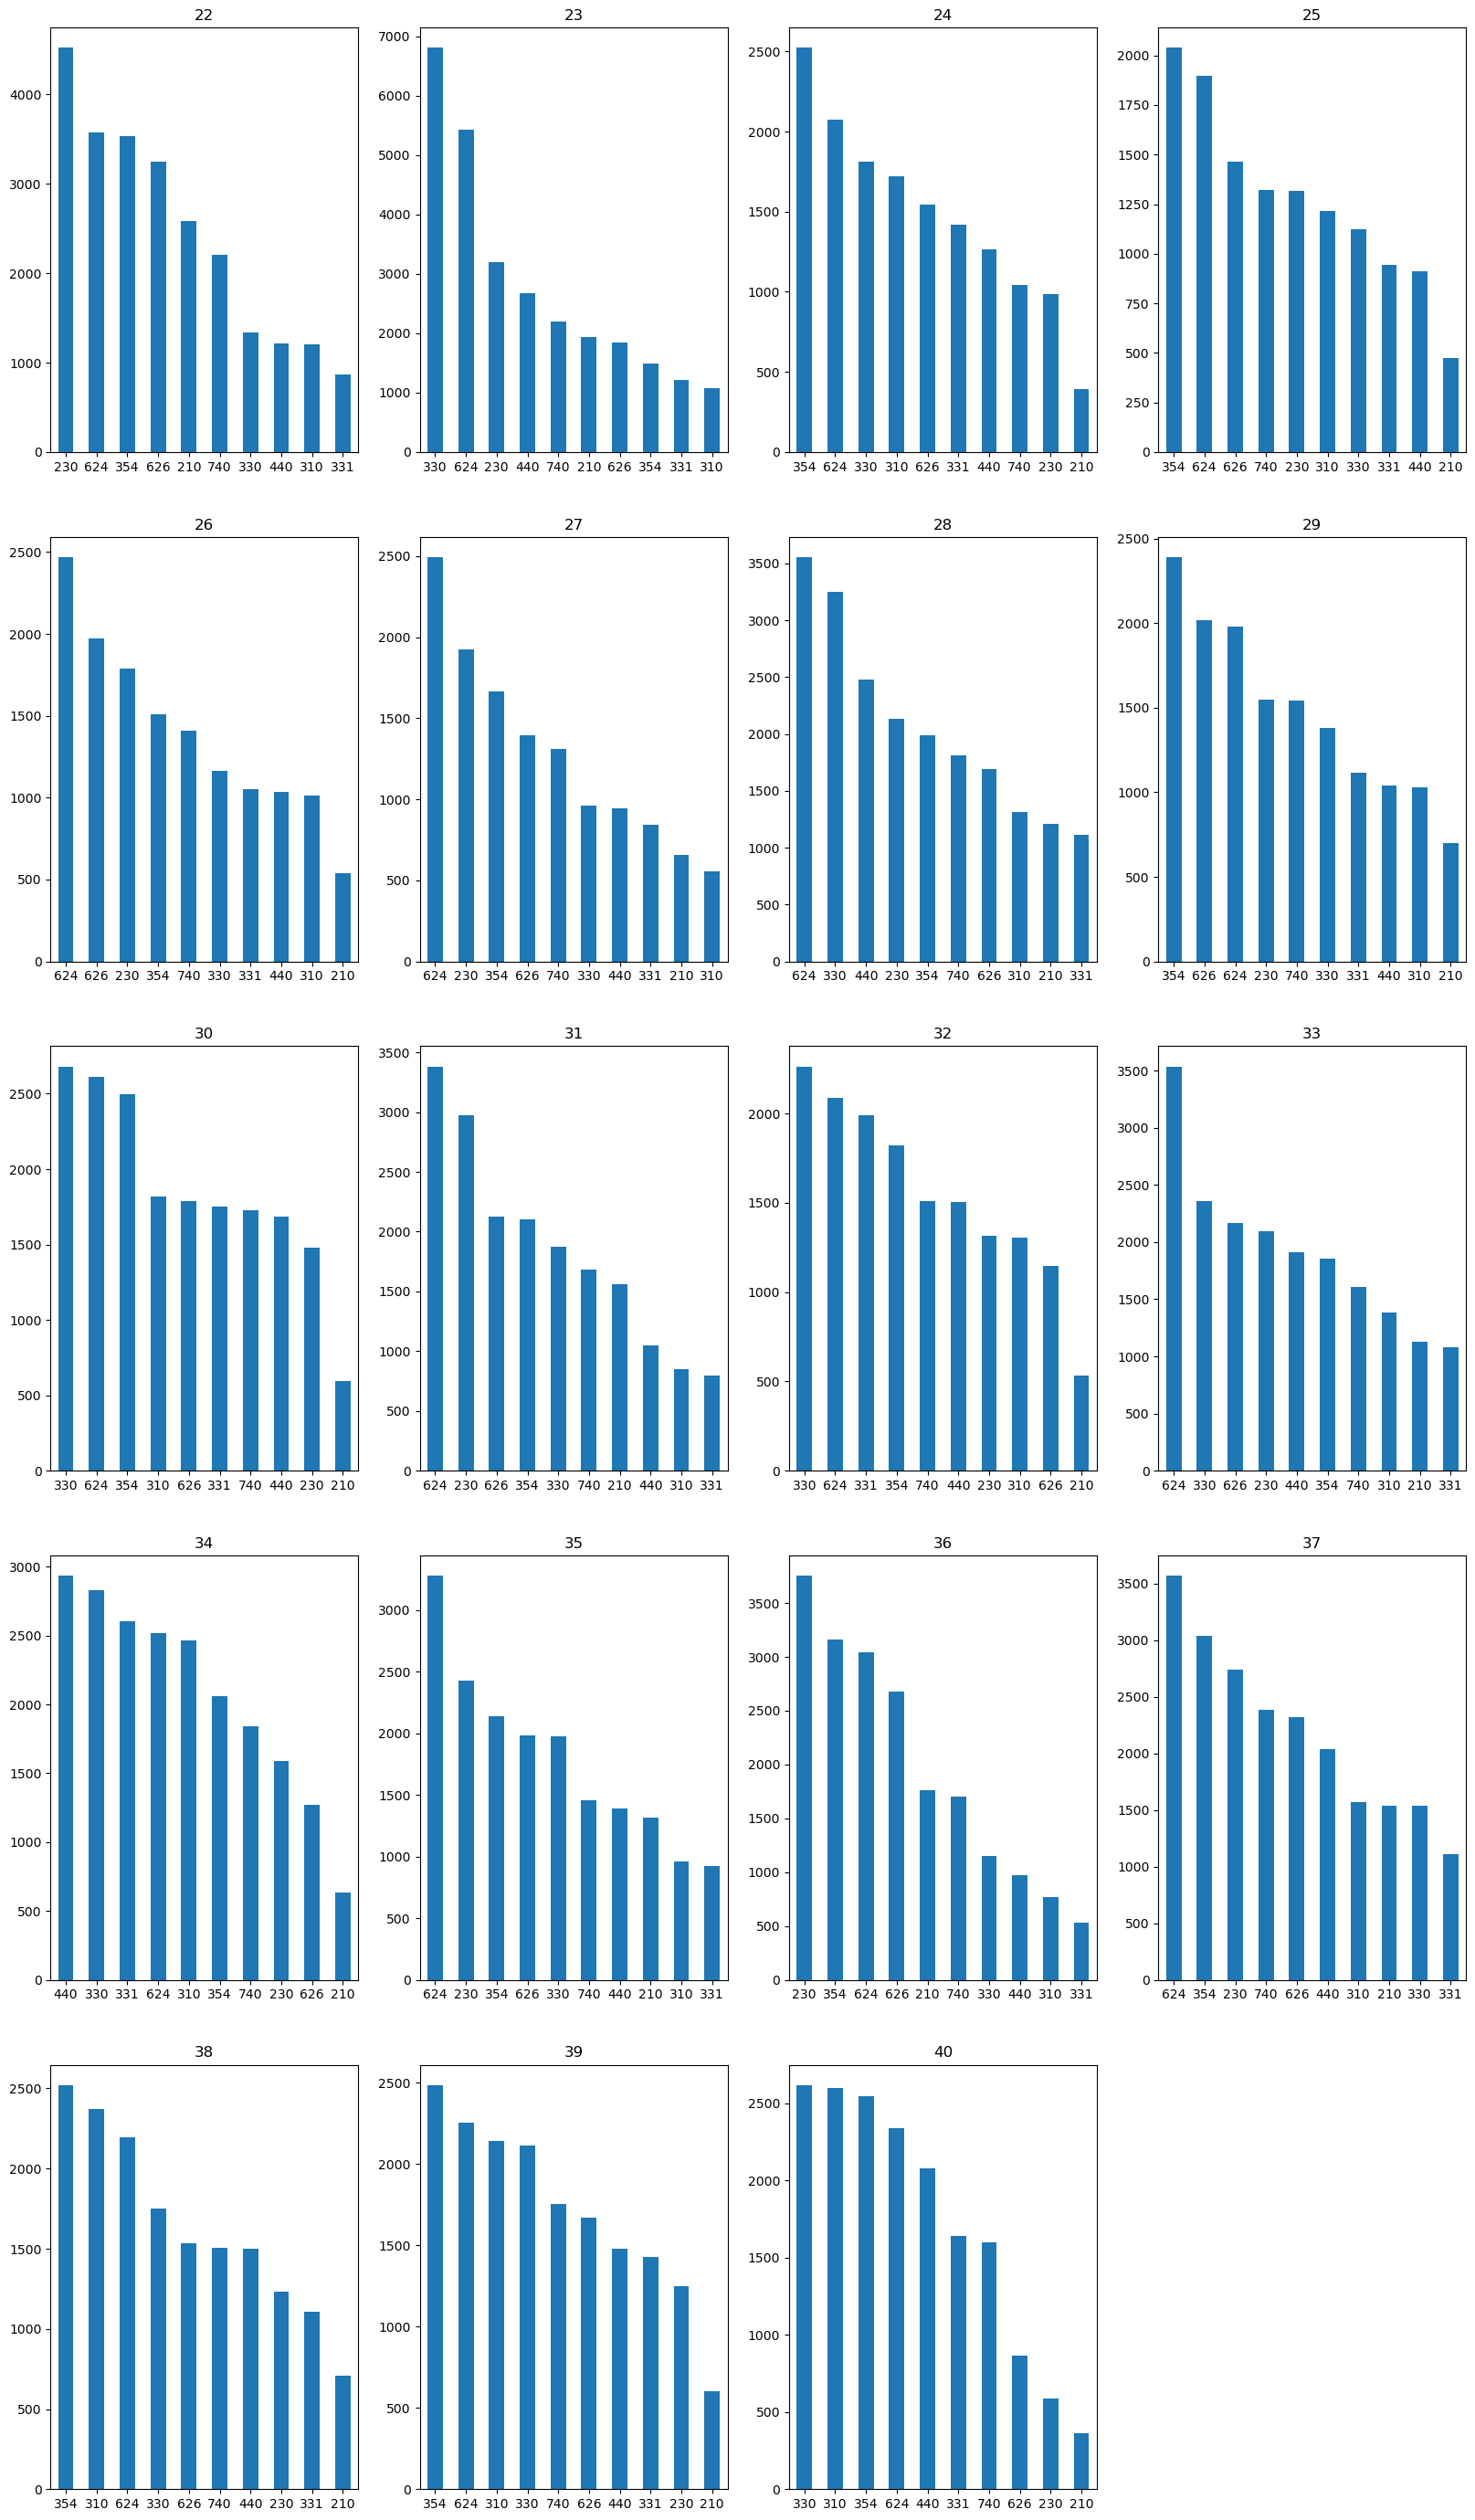

In [573]:
#frequencia entre vict age e crm cd
idades = data_ajust.groupby('Vict Age')['DR_NO'].count().sort_values(ascending=False).index[:20]
idades = sorted(idades)
plt.figure(figsize = ((20, 35)))
for i in range(1,len(idades)):
    plt.subplot(5,4,i)
    df_reduzido = data_ajust[(data_ajust['AREA NAME']==areas[i-1]) & (data_ajust['Crm Cd Desc'].isin(lista_crimes))]
    descendencia = df_reduzido['Crm Cd'].value_counts()
    descendencia.plot(kind='bar') 
    plt.title(idades[i-1], fontsize = 12)
    plt.xticks(rotation=0)

**Percepções:**
- Ocorrências em média por volta das 13:30, embora haja uma frequência mais alta a partir de 12:00 até 20:00 em comparação à janela de 00:00 até 12:00;
- Ocorrências mais frequentes com vítimas na faixa dos 26 aos 35 anos correspondendo a cerca de 28.2% da base de dados;
- As 5 áreas (23.8%) que mais ocorrências acontecem crimes correspondem a 30.7% dos registros;
- Concentração absoluta dos crimes ocorrem com pessoas de sexo masculino e feminino (98.8%);
- Concentração absoluta dos crimes ocorrem com pessoas de descendência hispânica, branca, preta e oriental (97.2%);
- Os crimes se concentram nas ruas e em complexos habitacionais;
- Os métodos mais utilizados pelos criminosos não envolvem armas, se limitando à agressão verbal ou uso de força;
- A média de idade das vítimas está em 40 anos, tendo algumas regiões possuindo vítimas com idade média acima, enquanto que regiões possuem vítimas de idade abaixo;
- Determinadas regiões tem perfil de vítimas mais claros em termos de sexo e descendência, o que pode indicar a maior concentração desses perfis nos locais. Outras apresentam maior equilíbrio;
- 20% dos tipos de crimes correspondem a 90.9% das ocorrências;
- Algumas regiões tem perfis de crimes diferentes de outras para os 10 tipos de crimes mais recorrentes;
- Para diferentes idades, há alguma variação entre os tipos de crimes mais recorrente.

**Principais pontos a trabalhar sob a ótica de um potencial turista:**
- Relação área e tipo de crime: compreender as principais áreas que podem incorrer risco de ser vítima de crime;
- Frequência dos principais crimes: preparar ações e comportamentos para reduzir o risco de ser vítima de crime;
- Relação área e hora do crime: entender padrões de horários que tendem a possuir maior risco de determinado crime ocorrer.

In [591]:
data_ajust.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569165 entries, 0 to 752910
Data columns (total 29 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   DR_NO            569165 non-null  int64  
 1   Date Rptd        569165 non-null  object 
 2   DATE OCC         569165 non-null  object 
 3   time             569165 non-null  int64  
 4   AREA             569165 non-null  int64  
 5   AREA NAME        569165 non-null  object 
 6   Rpt Dist No      569165 non-null  int64  
 7   Part 1-2         569165 non-null  int64  
 8   crm_cd           569165 non-null  int64  
 9   Crm Cd Desc      569165 non-null  object 
 10  Mocodes          569165 non-null  object 
 11  vic_age          569165 non-null  int64  
 12  Vict Sex         569165 non-null  object 
 13  Vict Descent     569165 non-null  object 
 14  Premis Cd        569165 non-null  object 
 15  Premis Desc      569165 non-null  object 
 16  weapon_cd        569165 non-null  obje

In [594]:
data_ajust = data_ajust.rename(columns={'TIME OCC':'time'})
data_ajust = data_ajust.rename(columns={'Crm Cd':'crm_cd'})
data_ajust = data_ajust.rename(columns={'Vict Age':'vic_age'})
data_ajust = data_ajust.rename(columns={'Vict Sex':'vic_sex'})
data_ajust = data_ajust.rename(columns={'Vict Descent':'vic_des'})
data_ajust = data_ajust.rename(columns={'Weapon Used Cd':'weapon_cd'})

In [640]:
modelo = smf.ols('''np.log(vic_age) ~ np.power(time,2) + np.log(AREA) + np.log(crm_cd) + 
                 vic_sex + vic_des + np.power(LAT,2) + np.power(LON,2)''', data = data_ajust).fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        np.log(vic_age)   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.052
Method:                 Least Squares   F-statistic:                     1198.
Date:                Fri, 14 Jul 2023   Prob (F-statistic):               0.00
Time:                        18:57:00   Log-Likelihood:            -3.0460e+05
No. Observations:              569165   AIC:                         6.092e+05
Df Residuals:                  569138   BIC:                         6.096e+05
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             3.5970      0.013    274.612      0.000       3.571       3.623
vic_sex[T.H]         -0.0242      0.045     -0.534      0.593      -0.113       0.065
vic_sex[T.M]          0.0553      0.001     49.436      0.000       0.053       0.057
vic_sex[T.X]         -0.3695      0.007    -52.037      0.000      -0.383      -0.356
vic_des[T.B]         -0.0715      0.003    -20.465      0.000      -0.078      -0.065
vic_des[T.C]         -0.1672      0.008    -19.833      0.000      -0.184      -0.151
vic_des[T.D]         -0.1936      0.058     -3.341      0.001      -0.307      -0.080
vic_des[T.F]         -0.0402      0.008     -4.959      0.000      -0.056      -0.024
vic_des[T.G]         -0.0759      0.059     -1.297      0.195      -0.191       0.039
vic_des[T.H]         -0.1429      0.003    -42.481      0.000      -0.149      -0.136
vic_des[T.I]         -0.1364      0.016     -8.646      0.000      -0.167      -0.105
vic_des[T.J]          0.0526      0.013      4.006      0.000       0.027       0.078
vic_des[T.K]          0.0061      0.007      0.835      0.404      -0.008       0.020
vic_des[T.L]         -0.1517      0.061     -2.485      0.013      -0.271      -0.032
vic_des[T.O]         -0.0097      0.004     -2.606      0.009      -0.017      -0.002
vic_des[T.P]         -0.0573      0.029     -1.969      0.049      -0.114      -0.000
vic_des[T.S]         -0.0449      0.067     -0.669      0.503      -0.176       0.087
vic_des[T.U]         -0.1281      0.037     -3.439      0.001      -0.201      -0.055
vic_des[T.V]         -0.1440      0.015     -9.384      0.000      -0.174      -0.114
vic_des[T.W]          0.0294      0.003      8.566      0.000       0.023       0.036
vic_des[T.X]         -0.1499      0.006    -24.076      0.000      -0.162      -0.138
vic_des[T.Z]         -0.1363      0.022     -6.247      0.000      -0.179      -0.094
np.power(time, 2) -9.027e-09    3.4e-10    -26.563      0.000   -9.69e-09   -8.36e-09
np.log(AREA)          0.0143      0.001     21.812      0.000       0.013       0.016
np.log(crm_cd)        0.0103      0.001      8.650      0.000       0.008       0.013
np.power(LAT, 2)      0.0004   8.68e-05      4.623      0.000       0.000       0.001
np.power(LON, 2)  -3.539e-05   7.24e-06     -4.890      0.000   -4.96e-05   -2.12e-05
==============================================================================
Omnibus:                    86900.520   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           263013.973
Skew:                          -0.804   Prob(JB):                         0.00
Kurtosis:                       5.916   Cond. No.                     3.32e+08
==============================================================================

Notes:
[1] Standard Errors a

<AxesSubplot:xlabel='vic_age', ylabel='residuos'>

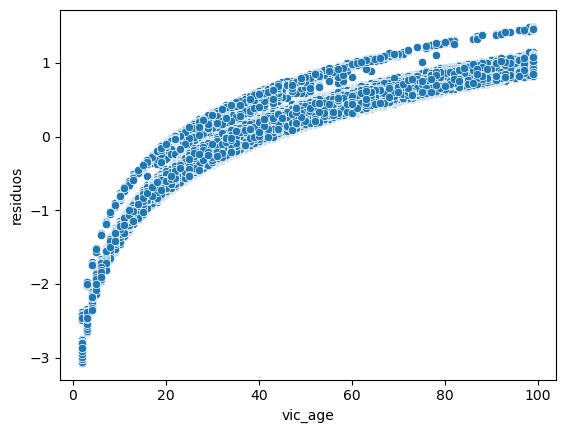

In [637]:
data_ajust['residuos'] = modelo.resid
sns.scatterplot(x = 'vic_age', y = 'residuos', data = data_ajust)

<AxesSubplot:xlabel='vic_age', ylabel='residuos'>

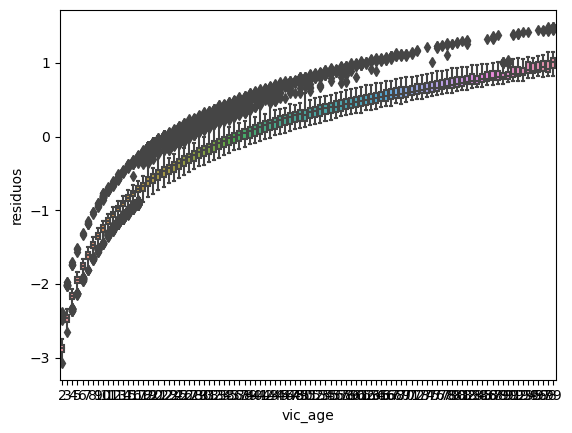

In [642]:
sns.boxplot(x = 'vic_age', y = 'residuos', data = data_ajust)

Apesar de diversos ajustes feitos no modelo e algum ganho em termo de R2, não se apresentaram resultados satisfatórios para melhora quanto aos resíduos que seguem indicando padrão frente à variável explicativa.

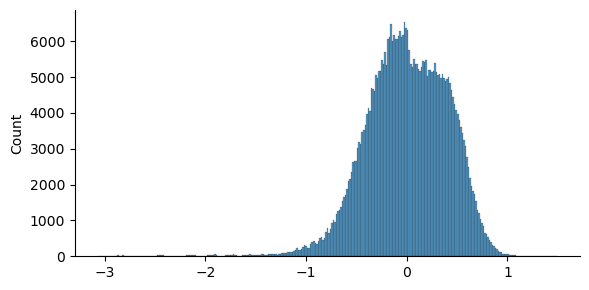

In [645]:
train, test = train_test_split(data_ajust, random_state=0, train_size = .75)
reg = smf.ols('''np.log(vic_age) ~ np.power(time,2) + np.log(AREA) + np.log(crm_cd) + 
                 vic_sex + vic_des + np.power(LAT,2) + np.power(LON,2)''',data = train).fit()
sns.displot(reg.resid, height=3, aspect=2);

<AxesSubplot:xlabel='preditos', ylabel='residuos'>

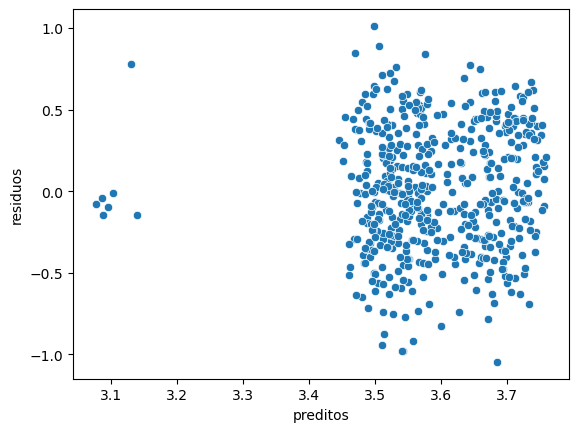

In [647]:
train['residuos'] = reg.resid
train['preditos'] = reg.predict()
sns.scatterplot(x = 'preditos', y = 'residuos', data=train.sample(n=525,random_state=1))

<AxesSubplot:xlabel='vic_age', ylabel='residuos'>

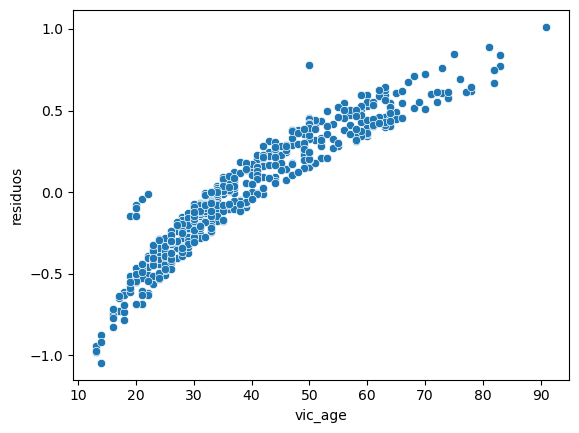

In [648]:
sns.scatterplot(x = 'vic_age', y = 'residuos', data=train.sample(n=525,random_state=1))

Avaliando as suposições do modelo, temos que:

- Normalidade: os resíduos apresentam distribuição próxima à normal, logo os estimadores possuem a distribuição estudada;
- Homocedasticidade: ao plotar os resíduos pelos preditos há a indicação da procedência a essa suposição, assim indicando confiança na variância das previsões;
- Independência: já esperado, o comportamento dos resíduos é influenciado pela idade da vítima, assim há uma violação quanto a essa suposição.

C:\Users\Acer\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:696: RuntimeWarning: invalid value encountered in sqrt
  return self.resid / sigma / np.sqrt(1 - hii)


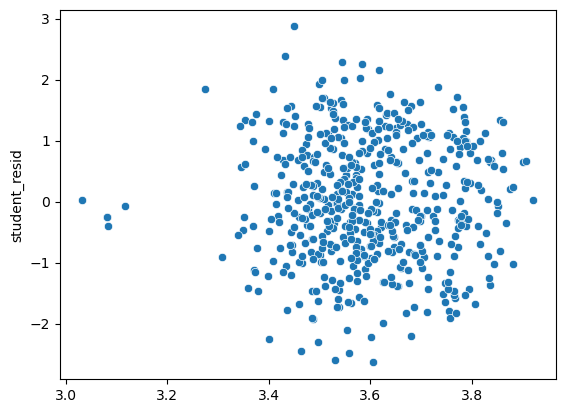

In [653]:
reg_sample = smf.ols('''np.log(vic_age) ~ np.power(time,2) + np.log(AREA) + np.log(crm_cd) + 
                 vic_sex + vic_des + np.power(LAT,2) + np.power(LON,2)''',data = train.sample(n=525,random_state=1)).fit()
st_res = reg_sample.outlier_test()
sns.scatterplot(x = reg_sample.predict(), y = st_res.student_resid);

In [660]:
variaveis = ['time','AREA','crm_cd','vic_sex','vic_des','LAT','LON']
train_dum = pd.get_dummies(train[variaveis], drop_first=True)
vars_vif = pd.DataFrame()
vars_vif["VIF Factor"] = [vif(train_dum, i) for i in range(train_dum.shape[1])]
vars_vif["Feature"] = train_dum.columns
vars_vif.round(2)

,VIF Factor,Feature
0,5.07,time
1,4.33,AREA
2,6.06,crm_cd
3,139087.09,LAT
4,138851.22,LON
5,1.01,vic_sex_H
6,2.09,vic_sex_M
7,2.01,vic_sex_X
8,7.04,vic_des_B
9,1.16,vic_des_C


In [661]:
reg_ajustado = smf.ols('''np.log(vic_age) ~ np.power(time,2) + np.log(AREA) + np.log(crm_cd) + 
                 vic_sex + vic_des''',data = train).fit()
test['preditos'] = reg.predict(test.loc[:,test.columns!='vic_age'])
test['preditos_ajustado'] = reg_ajustado.predict(test.loc[:,test.columns!='vic_age'])
adj_r2 = (1-((1-r2_score(test['vic_age'],test['preditos']))*(len(test['preditos'])-1))/
          (len(test['preditos']) - test.shape[1]-1))
print("A acurácia dos preditos foi de {:.2f}%.".format(adj_r2))
adj_r2 = (1-((1-r2_score(test['vic_age'],test['preditos_ajustado']))*(len(test['preditos_ajustado'])-1))/
          (len(test['preditos_ajustado']) - test.shape[1]-1))
print("A acurácia dos preditos ajustados foi de {:.2f}%.".format(adj_r2))

A acurácia dos preditos foi de -5.35%.
A acurácia dos preditos ajustados foi de -5.35%.


Apesar das transformações e métodos aplicados, não se percebe melhora no modelo.